In [1]:
import os
import pandas as pd
import logging.config
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler #for matplotlib colors
import seaborn as sns
from sklearn import preprocessing

import plot_functions as pf
import importlib
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

LOGGING_CONFIG = os.getenv('LOGGING_CONFIG')
logging.config.fileConfig(LOGGING_CONFIG)
logger = logging.getLogger('prepare_data_for_eda')

In [2]:
DATADIR = os.getenv('DATADIR')
logger.info("using DATADIR {}".format(DATADIR))

2018-05-30 12:17:45,818 - prepare_data_for_eda - INFO - using DATADIR ../DATA


In [3]:
content_performance_bytime = pd.read_csv(os.path.join(DATADIR, 'content_performance_bytime.csv.gz'), parse_dates=True, compression='gzip', 
                                         dtype={'dimensions_date_id': 'object',
 'dimensions_item_id': 'float64',
 'pageviews': 'float64',
 'unique_pageviews': 'float64',
 'feedex_comments': 'float64',
 'is_this_useful_yes': 'float64',
 'is_this_useful_no': 'float64',
 'number_of_internal_searches': 'float64',
 'exits': 'float64',
 'entrances': 'float64',
 'bounce_rate': 'float64',
 'avg_time_on_page': 'float64',
 'id': 'int64',
 'content_id': 'object',
 'title': 'object',
 'base_path': 'object',
 'description': 'object',
 'number_of_pdfs': 'float64',
 'document_type': 'object',
 'content_purpose_document_supertype': 'object',
 'first_published_at': 'object',
 'public_updated_at': 'object',
 'number_of_word_files': 'float64',
 'status': 'object',
 'readability_score': 'float64',
 'contractions_count': 'float64',
 'equality_count': 'float64',
 'indefinite_article_count': 'float64',
 'passive_count': 'float64',
 'profanities_count': 'float64',
 'redundant_acronyms_count': 'float64',
 'repeated_words_count': 'float64',
 'simplify_count': 'float64',
 'spell_count': 'float64',
 'string_length': 'float64',
 'sentence_count': 'float64',
 'word_count': 'float64',
 'primary_organisation_title': 'object',
 'primary_organisation_content_id': 'object',
 'primary_organisation_withdrawn': 'object',
 'content_hash': 'object',
 'locale': 'object',
 'publishing_api_payload_version': 'int64',
 '_merge': 'category',
 'date': 'object',
 'count_survey_responses': 'float64',
 'response_per_pageview': 'float64',
 'response_per_unique_pageview': 'float64',
 'useful_per_responses': 'float64',
 'total_to_unique_pageviews': 'float64',
 'create_total_to_unique_pageviews': 'float64',
 'feedex_per_unique_1000': 'float64',
 'searches_per_pageview_1000': 'float64',
 'contractions_count_scaled': 'float64',
 'indefinite_article_count_scaled': 'float64',
 'redundant_acronyms_count_scaled': 'float64',
 'repeated_words_count_scaled': 'float64',
 'spell_count_scaled': 'float64',
 'readability_score_scaled': 'float64',
 'equality_count_scaled': 'float64',
 'passive_count_scaled': 'float64',
 'simplify_count_scaled': 'float64',
 'profanities_count_scaled': 'float64',
 'spelling_grammar': 'float64',
 'style': 'float64',
 'errors': 'float64'})

In [4]:
content_performance_bytime[['useful_per_responses']]

,useful_per_responses
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


### Dates to index for plots

In [5]:
# ### Dates to index for plots
logger.info("dates to index")
content_performance_bytime['date'] = pd.to_datetime(content_performance_bytime['dimensions_date_id'])
content_performance_bytime.index = content_performance_bytime['date']

2018-05-30 12:22:56,041 - prepare_data_for_eda - INFO - dates to index


In [6]:
type(content_performance_bytime['date'][0])

pandas._libs.tslib.Timestamp

In [7]:
content_performance_bytime.index

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-21', '2018-04-06', '2018-04-07', '2018-05-14',
               '2018-04-08', '2018-04-09',
               ...
               '2018-05-01', '2018-05-02', '2018-05-01', '2018-05-02',
               '2018-05-01', '2018-05-02', '2018-05-01', '2018-05-02',
               '2018-05-01', '2018-05-02'],
              dtype='datetime64[ns]', name='date', length=18266364, freq=None)

## Metric over time

In [8]:
grouped_pageviews = content_performance_bytime.groupby(pd.Grouper(key='date', freq='D', sort=True))['pageviews'].sum()

In [9]:
grouped_pageviews

date
2018-04-02     6489054.0
2018-04-03    10665338.0
2018-04-04    10391974.0
2018-04-05     9576678.0
2018-04-06     9228406.0
2018-04-07     5564297.0
2018-04-08     5669463.0
2018-04-09    10993827.0
2018-04-10    10489138.0
2018-04-11    10109938.0
2018-04-12    10001064.0
2018-04-13     8585845.0
2018-04-14     4958233.0
2018-04-15     5557445.0
2018-04-16    11091190.0
2018-04-17    10888563.0
2018-04-18     9397799.0
2018-04-19     8919357.0
2018-04-20     7758391.0
2018-04-21     4433371.0
2018-04-22     4995586.0
2018-04-23    10865305.0
2018-04-24    10726744.0
2018-04-25    10436481.0
2018-04-26    10002058.0
2018-04-27     9007352.0
2018-04-28     5173875.0
2018-04-29     5507766.0
2018-04-30    11771067.0
2018-05-01    10511552.0
2018-05-02    10449264.0
2018-05-03     9327105.0
2018-05-04     7950710.0
2018-05-05     4009107.0
2018-05-06     3447648.0
2018-05-07     4926571.0
2018-05-08    10096629.0
2018-05-09    10101739.0
2018-05-10     9733454.0
2018-05-11     84442

In [10]:
grouped_pageviews.shape

(43,)

In [11]:
type(grouped_pageviews[0])

numpy.float64

In [12]:
grouped_useful = content_performance_bytime.groupby([content_performance_bytime.index, pd.Grouper(freq='D')])['useful_per_responses'].mean() #resample operation for each day in datime index, meanof the metric
grouped_useful.index = grouped_useful.index.droplevel()

In [13]:
grouped_unique_pageviews = content_performance_bytime.groupby([content_performance_bytime.index, pd.Grouper(freq='D')])['unique_pageviews'].sum() #resample operation for each day in datime index, sum the metric
grouped_unique_pageviews.index = grouped_unique_pageviews.index.droplevel()

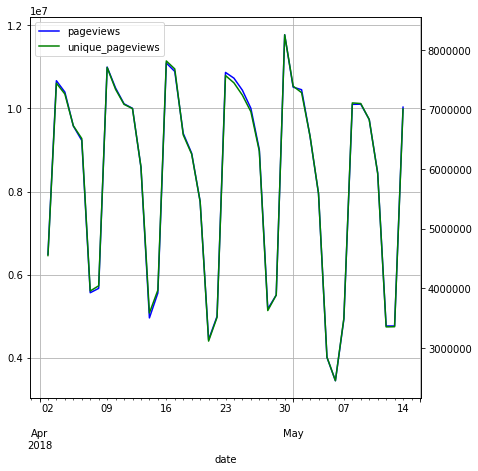

In [14]:
plt.figure(figsize=(7,7))
plt.xlabel('Date')

ax1 = grouped_pageviews.plot(color='blue', label='pageviews')
ax2 = grouped_unique_pageviews.plot(color='green', grid=True, secondary_y=True, label='unique_pageviews')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

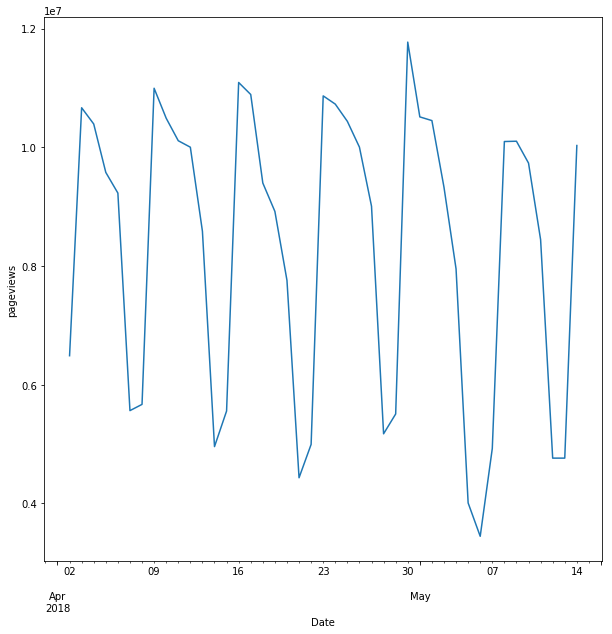

In [15]:
pf.plot_time_metric(grouped_pageviews)

In [16]:
grouped_pageviews.name

'pageviews'

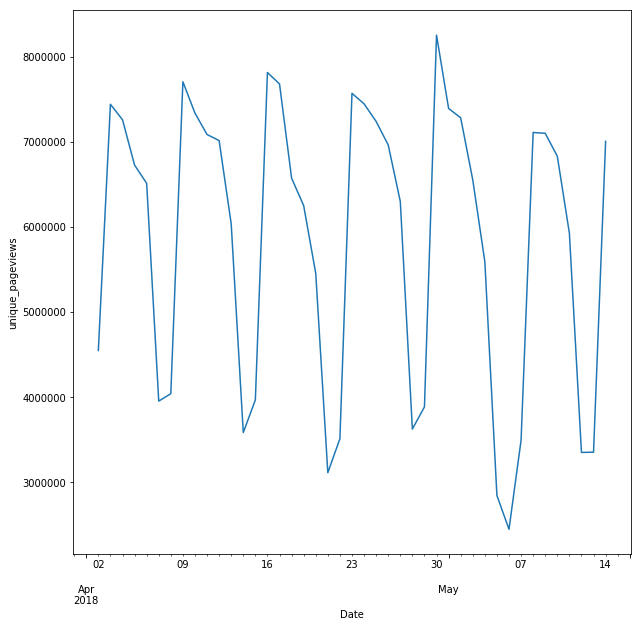

In [17]:
pf.plot_time_metric(grouped_unique_pageviews)

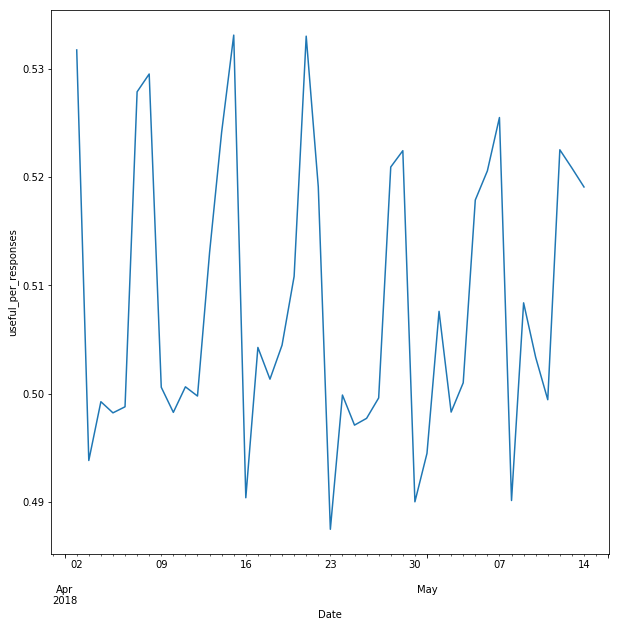

In [18]:
pf.plot_time_metric(grouped_useful)

In [19]:
# content_performance_bytime.groupby(pd.Grouper(key='date', sort=True))['pageviews'].sum()

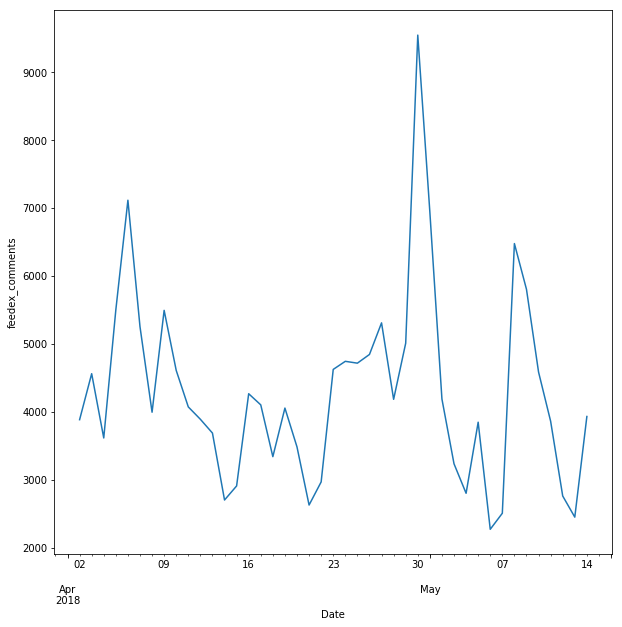

In [20]:
pf.group_plot_time_metric(content_performance_bytime, 'feedex_comments')

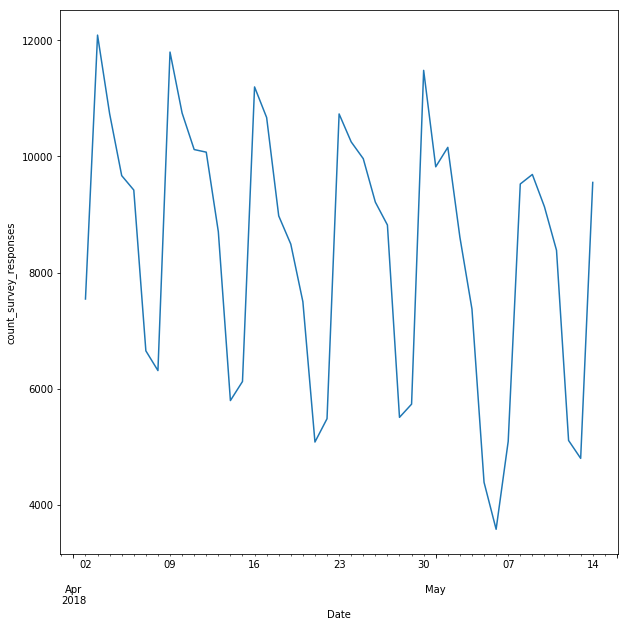

In [21]:
pf.group_plot_time_metric(content_performance_bytime, 'count_survey_responses')

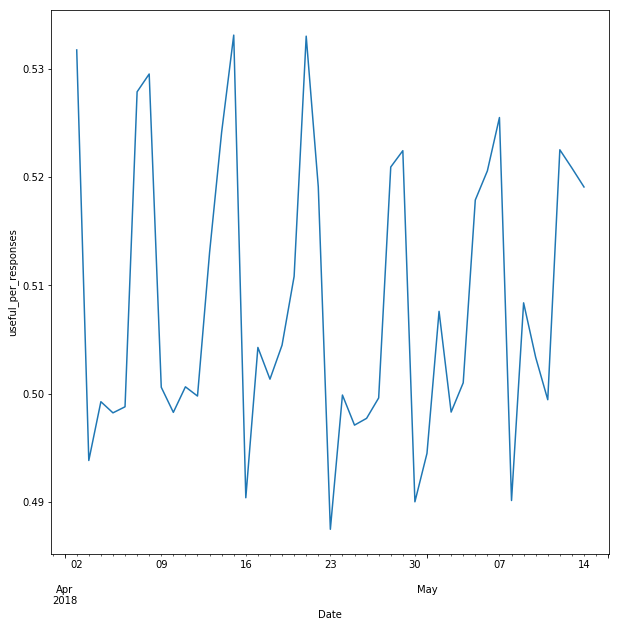

In [39]:
pf.group_plot_time_metric(content_performance_bytime, 'useful_per_responses', aggregation='mean')

### Stratify by categorical variables

(<matplotlib.axes._subplots.AxesSubplot at 0x11c0ebef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129352ac8>)

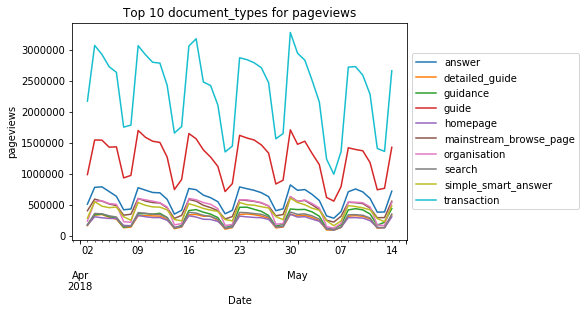

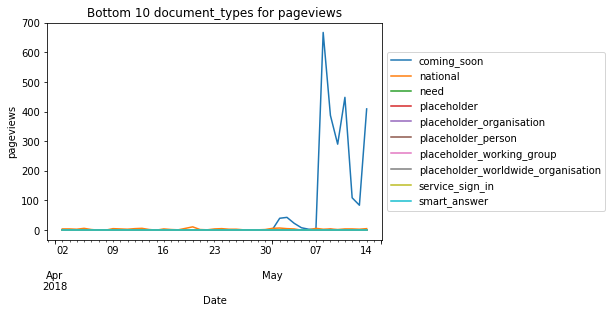

In [22]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='document_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x11887c940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x155b73710>)

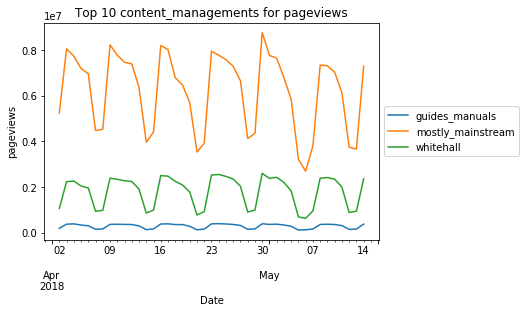

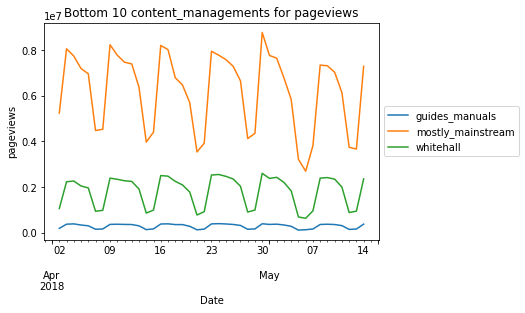

In [51]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='content_management')

(<matplotlib.axes._subplots.AxesSubplot at 0x125767eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b35eb70>)

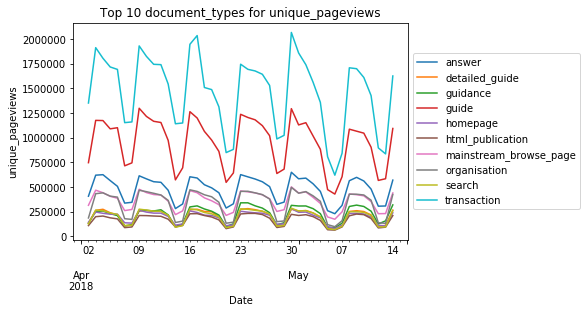

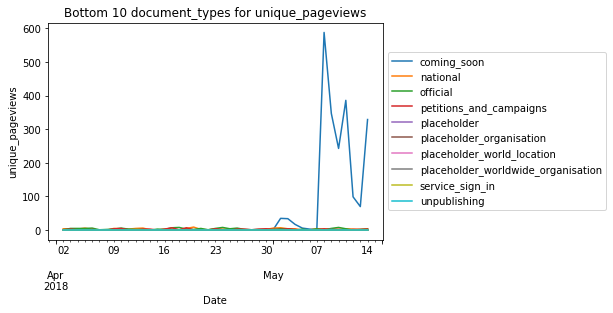

In [23]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='document_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x11896cb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118b9a160>)

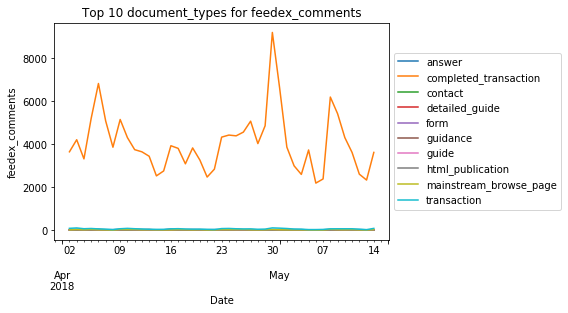

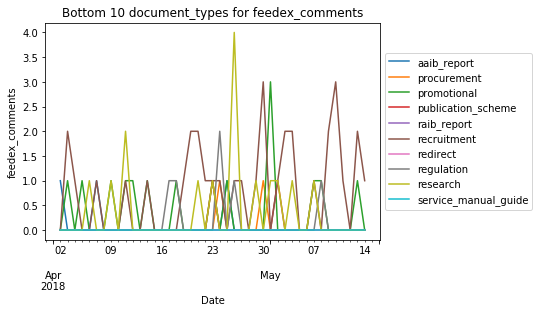

In [24]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='document_type')

Document types with no page views in date range

In [25]:
#over the whole month (includes entire data range) total number of page views 

x = content_performance_bytime.groupby(['document_type', pd.Grouper(freq='M')])['pageviews'].sum()

In [26]:
#which documen types had no page views
x[x==0]

document_type                       date      
need                                2018-04-30    0.0
                                    2018-05-31    0.0
placeholder_organisation            2018-04-30    0.0
                                    2018-05-31    0.0
placeholder_person                  2018-04-30    0.0
                                    2018-05-31    0.0
placeholder_working_group           2018-04-30    0.0
                                    2018-05-31    0.0
placeholder_world_location          2018-04-30    0.0
                                    2018-05-31    0.0
placeholder_worldwide_organisation  2018-04-30    0.0
                                    2018-05-31    0.0
service_sign_in                     2018-04-30    0.0
                                    2018-05-31    0.0
smart_answer                        2018-04-30    0.0
                                    2018-05-31    0.0
unpublishing                        2018-04-30    0.0
                                   

(<matplotlib.axes._subplots.AxesSubplot at 0x118c45fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117045400>)

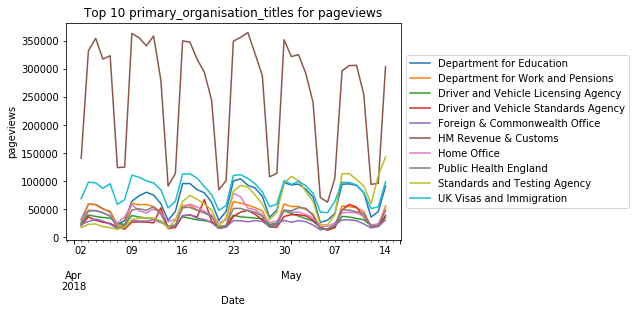

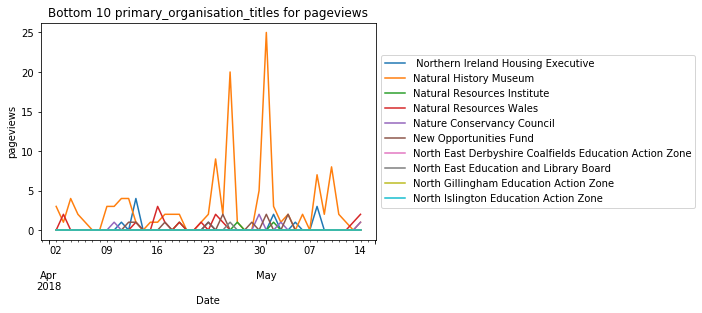

In [27]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x11711bdd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118233a90>)

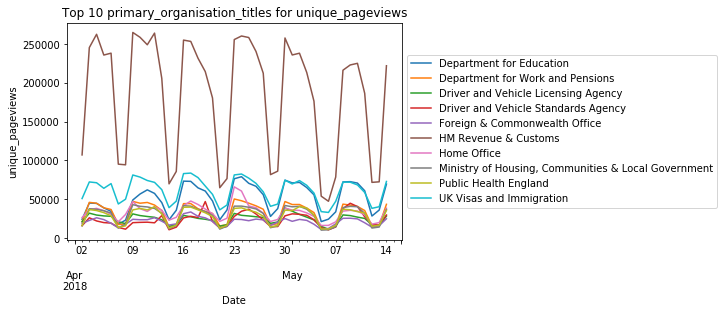

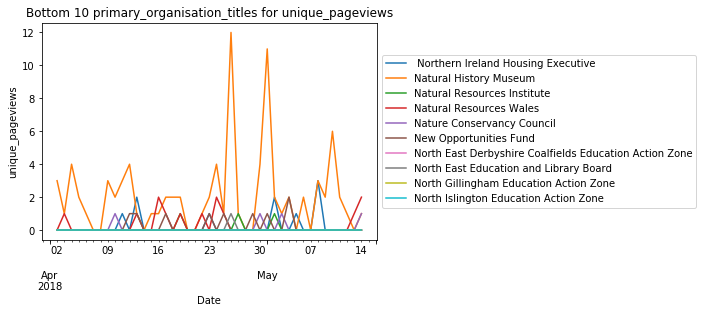

In [28]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x1182f6cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1185adfd0>)

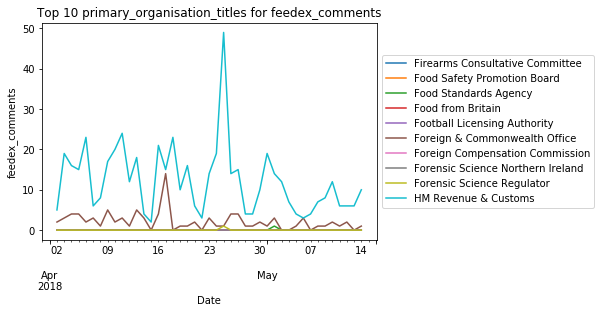

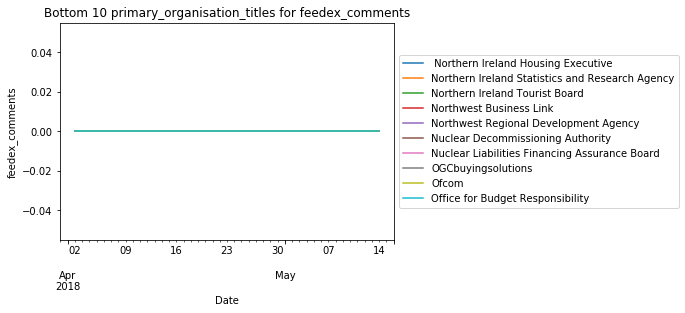

In [29]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x1186b6da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1185f4fd0>)

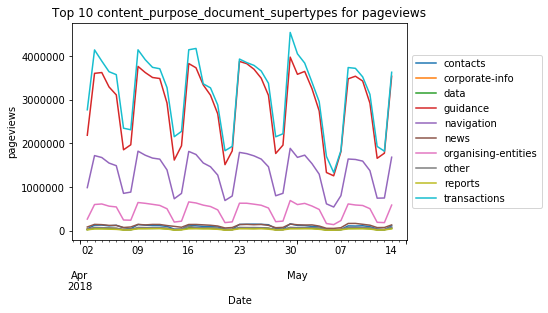

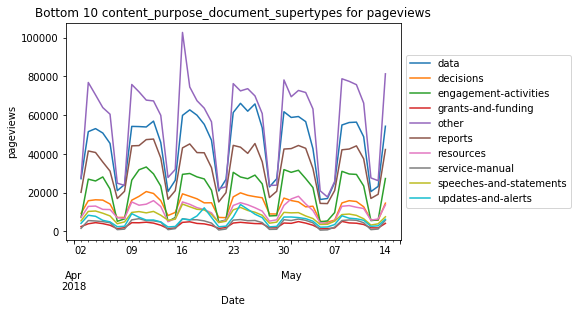

In [30]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='content_purpose_document_supertype')

(<matplotlib.axes._subplots.AxesSubplot at 0x10fbc04a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119209b70>)

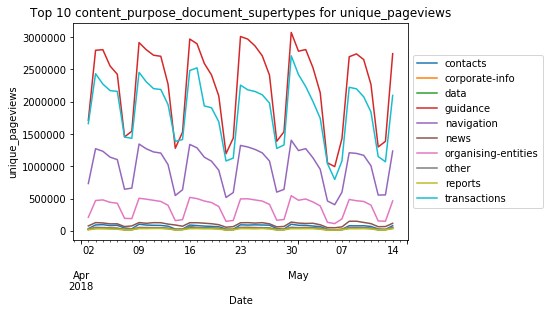

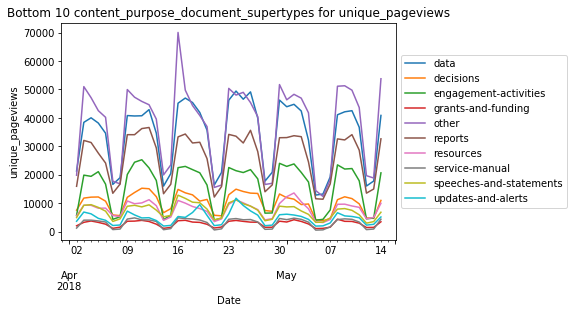

In [31]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='content_purpose_document_supertype')

(<matplotlib.axes._subplots.AxesSubplot at 0x1192d0080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11952f668>)

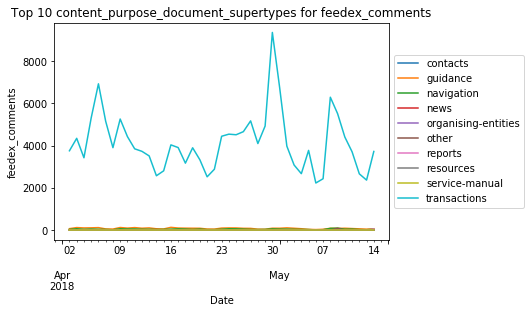

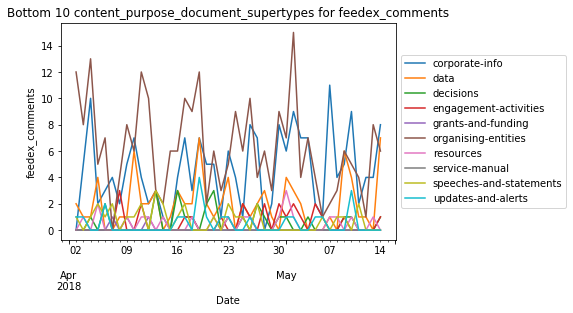

In [32]:
pf.plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='content_purpose_document_supertype')

### Didn't finish this, making a category of the new consoldated format to group by

In [33]:
# content_performance_bytime['consolidated_format'] = content_performance_bytime['document_type'].astype('category')
# content_performance_bytime['consolidated_format'].cat.categories

# content_performance_bytime['consolidated_format'].cat.rename_categories({'Specialist alerts': 'comms', 
#                                                                          'news_story': 'comms', 
#                                                                          'press_release': 'comms', 
#                                                                          'press_release': 'comms',
# News story
# Press release
# Government response
# World news story
# Foreign lang news
# Fatality notice
# Speech
# Statements
# Case studies
# , 2: 'y', 3: 'z'})

## trying to get weekday onto plot. 
Aborted for now. think ax.table might work

## WEEKDAY STILL WRONG!
1st Apr=sunday


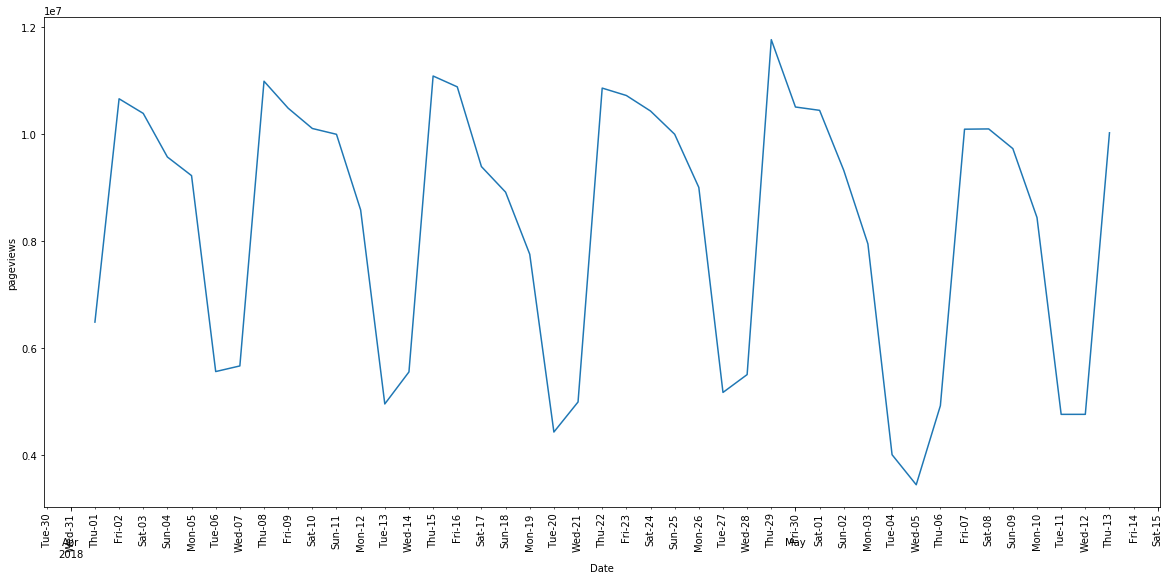

In [35]:

fig, ax = plt.subplots()
#days = mdates.DayLocator()
# months = mdates.MonthLocator()  # every month

dfmt = mdates.DateFormatter('%a-%d')

    
ax = grouped_pageviews.plot(figsize=(20, 10))
ax.set_ylabel('pageviews')
ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(days)
ax.xaxis.set_minor_formatter(dfmt)
fig.autofmt_xdate(rotation=90, ha='center', which='minor')

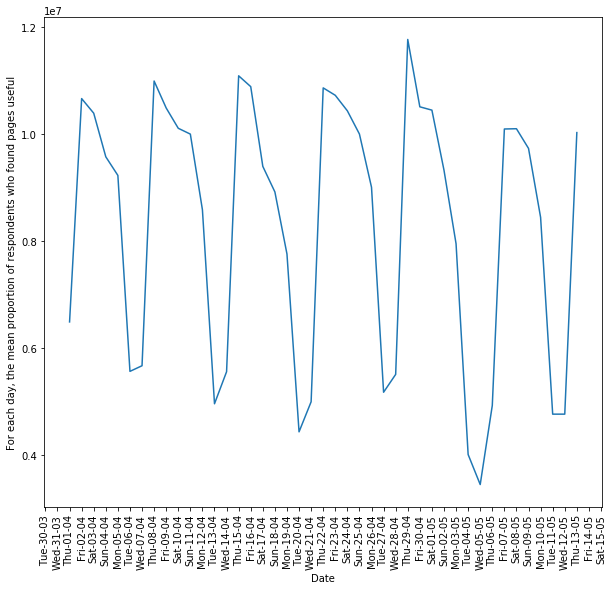

In [42]:

fig, ax = plt.subplots()
days = mdates.DayLocator()
dfmt = mdates.DateFormatter('%a-%d-%m')
# months = mdates.MonthLocator()  # every month
weekdays = mdates.WeekdayLocator()
weekday_fmt = mdates.DateFormatter('%a')

    
ax = grouped_pageviews.plot(figsize=(10, 10))
ax.set_ylabel('For each day, the mean proportion of respondents who found pages useful')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(weekdays)
#ax.xaxis.set_minor_formatter(weekday_fmt)
fig.autofmt_xdate(rotation=90, ha='center')


In [43]:
grouped = content_performance_bytime.groupby([content_performance_bytime.index, pd.Grouper(freq='D')])['pageviews'].sum()
grouped.index = grouped.index.droplevel()


In [44]:
grouped = grouped.to_frame()

In [45]:
grouped['day'] = grouped.index.weekday_name

In [46]:
grouped

,pageviews,day
date,,
2018-04-02,6489054.0,Monday
2018-04-03,10665338.0,Tuesday
2018-04-04,10391974.0,Wednesday
2018-04-05,9576678.0,Thursday
2018-04-06,9228406.0,Friday
2018-04-07,5564297.0,Saturday
2018-04-08,5669463.0,Sunday
2018-04-09,10993827.0,Monday
2018-04-10,10489138.0,Tuesday


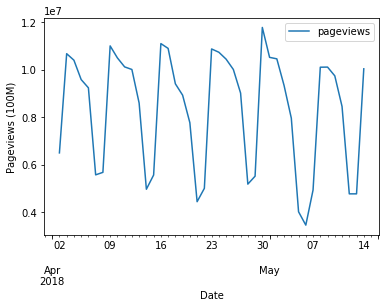

In [47]:
ax = grouped.plot()
ax.set_ylabel('Pageviews (100M)')
ax.set_xlabel('Date')
plt.show()

In [48]:
list(zip(grouped.index, grouped.index.weekday_name))

[(Timestamp('2018-04-02 00:00:00', freq='D'), 'Monday'),
 (Timestamp('2018-04-03 00:00:00', freq='D'), 'Tuesday'),
 (Timestamp('2018-04-04 00:00:00', freq='D'), 'Wednesday'),
 (Timestamp('2018-04-05 00:00:00', freq='D'), 'Thursday'),
 (Timestamp('2018-04-06 00:00:00', freq='D'), 'Friday'),
 (Timestamp('2018-04-07 00:00:00', freq='D'), 'Saturday'),
 (Timestamp('2018-04-08 00:00:00', freq='D'), 'Sunday'),
 (Timestamp('2018-04-09 00:00:00', freq='D'), 'Monday'),
 (Timestamp('2018-04-10 00:00:00', freq='D'), 'Tuesday'),
 (Timestamp('2018-04-11 00:00:00', freq='D'), 'Wednesday'),
 (Timestamp('2018-04-12 00:00:00', freq='D'), 'Thursday'),
 (Timestamp('2018-04-13 00:00:00', freq='D'), 'Friday'),
 (Timestamp('2018-04-14 00:00:00', freq='D'), 'Saturday'),
 (Timestamp('2018-04-15 00:00:00', freq='D'), 'Sunday'),
 (Timestamp('2018-04-16 00:00:00', freq='D'), 'Monday'),
 (Timestamp('2018-04-17 00:00:00', freq='D'), 'Tuesday'),
 (Timestamp('2018-04-18 00:00:00', freq='D'), 'Wednesday'),
 (Timestamp

That's a bit odd. Assumed 12/13th would be weekend but they're Thurs/Friday. 

In [49]:
grouped.index.weekday_name

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'],
      dtype='object', name='date')